In [1]:
import os 
import sys
while os.path.split(os.getcwd())[1] != 'RecSysChallenge2023-Team':
    os.chdir('..')
sys.path.insert(1, os.getcwd())

import numpy as np 

In [2]:
path_save= "Daniele/Recommenders/Hybrid_KNN_RP3Beta_SSLIM_Elastic/saved_models"
if not os.path.exists(path_save):
    os.makedirs(path_save)

In [3]:
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Evaluation.Evaluator import EvaluatorHoldout

import Daniele.Utils.MyDataManager as dm 
import Daniele.Utils.MatrixManipulation as mm
import Daniele.Utils.SaveSparceMatrix as ssm

URMv = dm.getURMviews()
URMo = dm.getURMopen()
ICMt=dm.getICMt()
ICMl=dm.getICMl()

name="train.csv"
dir = os.path.join(path_save,name)
if not os.path.exists(dir):
    URMv_train, URMv_test = split_train_in_two_percentage_global_sample(URMv, train_percentage = 0.80)

    ssm.saveMatrix(dir,URMv_train)

    name="test.csv"
    dir = os.path.join(path_save,name)
    ssm.saveMatrix(dir,URMv_test)

    urm_def = mm.defaultExplicitURM(urmv=URMv_train,urmo=URMo,icml=ICMl,icmt=ICMt, normalize=True, add_aug=True,appendICM=True)
    name="urm_def.csv"
    dir = os.path.join(path_save,name)
    ssm.saveMatrix(dir,urm_def)

    urm_bin = mm.defaultExplicitURM(urmv=URMv_train,urmo=URMo, normalize=False, add_aug=True)
    urm_bin.data = np.ones(len(urm_bin.data))
    name="urm_bin.csv"
    dir = os.path.join(path_save,name)
    ssm.saveMatrix(dir,urm_bin)

else:
    URMv_train=ssm.readMatrix(dir)

    name="test.csv"
    dir = os.path.join(path_save,name)
    URMv_test=ssm.readMatrix(dir)

    name="urm_def.csv"
    dir = os.path.join(path_save,name)
    urm_def = ssm.readMatrix(dir)

    name="urm_bin.csv"
    dir = os.path.join(path_save,name)
    urm_bin = ssm.readMatrix(dir)



/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team


### SSLIIM BPR

In [4]:
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
name="sslim01"
dir = os.path.join(path_save,name)

sslim_recommender = SLIM_BPR_Cython(URM_train=urm_def)
if not os.path.exists(dir+".zip"):
    #{'topK': 51, 'epochs': 15, 'symmetric': True, 'sgd_mode': 'adam', 'lambda_i': 1e-05, 'lambda_j': 0.003215687724797301, 'learning_rate': 0.007114410195895492} -> MAP 0.0078853
    sslim_recommender.fit(topK= 51, epochs=15,symmetric=True, sgd_mode = 'adam', lambda_i = 1e-05, lambda_j=0.003215687724797301, learning_rate = 0.007114410195895492)
    sslim_recommender.save_model(path_save,name)
else:
    sslim_recommender.load_model(path_save,name)

   

SLIM_BPR_Recommender: URM Detected 2 ( 0.0%) users with no interactions.
SLIM_BPR_Recommender: Loading model from file 'Daniele/Recommenders/Hybrid_KNN_RP3Beta_SSLIM_Elastic/saved_modelssslim01'
SLIM_BPR_Recommender: Loading complete


### SLIIM-Elastic

In [5]:
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
name="slim_Elastic"
dir = os.path.join(path_save,name)

slim_elastic_recommender = MultiThreadSLIM_SLIMElasticNetRecommender(URM_train=urm_bin)
if not os.path.exists(dir+".zip"):
    
    slim_elastic_recommender.fit(alpha=0.003271, l1_ratio=0.006095, topK=884)
    slim_elastic_recommender.save_model(path_save,name)
else:
    slim_elastic_recommender.load_model(path_save,name)

SLIMElasticNetRecommender: URM Detected 3461 (12.4%) items with no interactions.
SLIMElasticNetRecommender: Loading model from file 'Daniele/Recommenders/Hybrid_KNN_RP3Beta_SSLIM_Elastic/saved_modelsslim_Elastic'
SLIMElasticNetRecommender: Loading complete


### KNN_CFCBF 

In [6]:
from Daniele.Recommenders.KNN_CFCBF.ItemKNN_CFCBF_Hybrid_Recommender import KNN_CFCBF_custom
name="knn_cfcbf"
dir = os.path.join(path_save,name)

KNN_recommender = KNN_CFCBF_custom(URMv_train,URMo,ICM_train=mm.augmentedICM(ICMt,ICMl))
if not os.path.exists(dir+".zip"):
    KNN_recommender.fit(topK= 744, shrink= 457, similarity= 'cosine', normalize= True, feature_weighting='TF-IDF')
    KNN_recommender.save_model(path_save,name)
else:
    KNN_recommender.load_model(path_save,name)

KNN_CFCBF_custom: URM Detected 3461 (12.4%) items with no interactions.
KNN_CFCBF_custom: Loading model from file 'Daniele/Recommenders/Hybrid_KNN_RP3Beta_SSLIM_Elastic/saved_modelsknn_cfcbf'
KNN_CFCBF_custom: Loading complete


### RP3Beta 


In [7]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
name="rp3beta"
dir = os.path.join(path_save,name)


rp3beta_recommender = RP3betaRecommender(urm_bin)
if not os.path.exists(dir+".zip"):
    # {'topK': 69, 'alpha': 0.6854042891733674, 'beta': 0.2763471245555947, 'normalize_similarity': True} -> MAP 0.0282084
    rp3beta_recommender.fit( topK=69, alpha=0.6854042891733674, beta=0.2763471245555947, normalize_similarity=True )
    rp3beta_recommender.save_model(path_save,name)
else:
    rp3beta_recommender.load_model(path_save,name)

RP3betaRecommender: URM Detected 3461 (12.4%) items with no interactions.
RP3betaRecommender: Loading model from file 'Daniele/Recommenders/Hybrid_KNN_RP3Beta_SSLIM_Elastic/saved_modelsrp3beta'
RP3betaRecommender: Loading complete


### RP3Beta - KNN_CFCBF

In [8]:
from Recommenders.KNN.ItemKNNCustomSimilarityRecommender import ItemKNNCustomSimilarityRecommender
alpha_knn_rp3 = 0.7
name="rp3beta-knn"
dir = os.path.join(path_save,name)


knn_rp3_recommender = ItemKNNCustomSimilarityRecommender(urm_def)
if not os.path.exists(dir+".zip"):
    knn_rp3_recommender.fit((1 - alpha_knn_rp3) * KNN_recommender.W_sparse + alpha_knn_rp3* rp3beta_recommender.W_sparse)
    knn_rp3_recommender.save_model(path_save,name)
else:
    knn_rp3_recommender.load_model(path_save,name)

ItemKNNCustomSimilarityRecommender: URM Detected 2 ( 0.0%) users with no interactions.
ItemKNNCustomSimilarityRecommender: Loading model from file 'Daniele/Recommenders/Hybrid_KNN_RP3Beta_SSLIM_Elastic/saved_modelsrp3beta-knn'
ItemKNNCustomSimilarityRecommender: Loading complete


### TopPop

In [9]:
from Recommenders.NonPersonalizedRecommender import TopPop
name="TopPop"
dir = os.path.join(path_save,name)

most_viewed = TopPop(urm_bin)
if not os.path.exists(dir+".zip"):
    most_viewed.fit()
    most_viewed.save_model(path_save,name)
else:
    most_viewed.load_model(path_save,name)

TopPopRecommender: URM Detected 3461 (12.4%) items with no interactions.
TopPopRecommender: Loading model from file 'Daniele/Recommenders/Hybrid_KNN_RP3Beta_SSLIM_Elastic/saved_modelsTopPop'
TopPopRecommender: Loading complete


### REFERENCE RP3Beta 0.052

In [10]:
best_reference = RP3betaRecommender(urm_bin)
#{'topK': 106, 'alpha': 0.6155817289031643, 'beta': 0.33427474623540737, 'normalize_similarity': True} -> MAP 0.0276355
best_reference.fit(topK= 106, alpha= 0.6155817289031643, beta= 0.33427474623540737, normalize_similarity= True)


RP3betaRecommender: URM Detected 3461 (12.4%) items with no interactions.
RP3betaRecommender: Similarity column 27968 (100.0%), 3317.39 column/sec. Elapsed time 8.43 sec


In [11]:
from Recommenders.KNN.ItemKNNCustomSimilarityRecommender import ItemKNNCustomSimilarityRecommender
alpha = 0.3
name="slim_combo"
dir = os.path.join(path_save,name)


slim_combo = ItemKNNCustomSimilarityRecommender(urm_def)
if not os.path.exists(dir+".zip"):

    slim_combo.fit((1 - alpha) * slim_elastic_recommender.W_sparse + alpha* sslim_recommender.W_sparse)
    slim_combo.save_model(path_save,name)
else:
    slim_combo.load_model(path_save,name)

ItemKNNCustomSimilarityRecommender: URM Detected 2 ( 0.0%) users with no interactions.
ItemKNNCustomSimilarityRecommender: Loading model from file 'Daniele/Recommenders/Hybrid_KNN_RP3Beta_SSLIM_Elastic/saved_modelsslim_combo'
ItemKNNCustomSimilarityRecommender: Loading complete


### Hybrid

In [12]:
from Daniele.Recommenders.Hybrid_KNN_RP3Beta_SSLIM_Elastic.hybrid import SSLIMRP3BetaKNNRecommender

hybrid = SSLIMRP3BetaKNNRecommender(urm_bin,urm_def)
hybrid.rp3beta_recommender = rp3beta_recommender
hybrid.sslim_BPR_recommender = sslim_recommender
hybrid.slim_recommender = slim_elastic_recommender
hybrid.slim_combo = slim_combo
hybrid.most_viewed = most_viewed


RP3BetaKNNRecommender: URM Detected 3461 (12.4%) items with no interactions.


### Hybrid Federico

In [13]:
from Federico.Recommenders.Hybrid_KNN_RP3Beta_SSLIM.hybrid import SSLIMRP3BetaKNNRecommender

hybrid_federico = SSLIMRP3BetaKNNRecommender(urm_bin)
hybrid_federico.rp3beta_recommender = rp3beta_recommender
hybrid_federico.sslim_recommender = slim_elastic_recommender


RP3BetaKNNRecommender: URM Detected 3461 (12.4%) items with no interactions.


### Users group

In [14]:
import numpy as np 
import scipy.sparse as sps

profile_length = np.ediff1d(sps.csr_matrix(URMv_train).indptr)
profile_length, profile_length.shape

block_size = int(len(profile_length)*0.05)
sorted_users = np.argsort(profile_length)

for group_id in range(0, 20):
    start_pos = group_id * block_size
    end_pos = min((group_id+1) * block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 2081, average p.len 5.12, median 5.0, min 0, max 6
Group 1, #users in group 2081, average p.len 7.24, median 7.0, min 6, max 8
Group 2, #users in group 2081, average p.len 8.36, median 8.0, min 8, max 9
Group 3, #users in group 2081, average p.len 9.29, median 9.0, min 9, max 10
Group 4, #users in group 2081, average p.len 10.14, median 10.0, min 10, max 11
Group 5, #users in group 2081, average p.len 11.00, median 11.0, min 11, max 11
Group 6, #users in group 2081, average p.len 12.00, median 12.0, min 11, max 12
Group 7, #users in group 2081, average p.len 12.86, median 13.0, min 12, max 13
Group 8, #users in group 2081, average p.len 13.75, median 14.0, min 13, max 14
Group 9, #users in group 2081, average p.len 14.73, median 15.0, min 14, max 15
Group 10, #users in group 2081, average p.len 15.80, median 16.0, min 15, max 17
Group 11, #users in group 2081, average p.len 17.27, median 17.0, min 17, max 18
Group 12, #users in group 2081, average p.len 18.62, 

In [15]:
MAP_recommender_per_group = {}
recommender_object_dict = {}

recommender_class = {"rp3beta_recommender" : rp3beta_recommender,
                     #"KNN_recommender" : KNN_recommender,
                     "sslim_recommender" : sslim_recommender,
                     "slim_elastic_recommender" : slim_elastic_recommender,
                     #"knn_rp3_recommender" : knn_rp3_recommender,
                     #"best_reference" :best_reference,
                     "hybrid" : hybrid,
                     #"hybrid_federico" : hybrid_federico,
                     }


for label, recommender_obj in recommender_class.items():
    recommender_object_dict[label] = recommender_obj

In [16]:
cutoff = 10

for group_id in range(0, 20):
    
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))
    
    
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    
    evaluator_test = EvaluatorHoldout(URMv_test, cutoff_list=[cutoff], ignore_users=users_not_in_group)
    
    for label, recommender in recommender_object_dict.items():
        result_df, _ = evaluator_test.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]

Group 0, #users in group 2081, average p.len 5.12, median 5.0, min 0, max 6
EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1916 (100.0%) in 1.26 sec. Users per second: 1523
EvaluatorHoldout: Processed 1916 (100.0%) in 1.17 sec. Users per second: 1639
EvaluatorHoldout: Processed 1916 (100.0%) in 1.48 sec. Users per second: 1292
EvaluatorHoldout: Processed 1916 (100.0%) in 4.34 sec. Users per second: 442
Group 1, #users in group 2081, average p.len 7.24, median 7.0, min 6, max 8
EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1916 (100.0%) in 2.36 sec. Users per second: 812
EvaluatorHoldout: Processed 1916 (100.0%) in 1.42 sec. Users per second: 1345
EvaluatorHoldout: Processed 1916 (100.0%) in 1.65 sec. Users per second: 1163
EvaluatorHoldout: Processed 1916 (100.0%) in 2.75 sec.

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2023 (100.0%) in 1.24 sec. Users per second: 1636
EvaluatorHoldout: Processed 2023 (100.0%) in 1.21 sec. Users per second: 1667


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2023 (100.0%) in 1.89 sec. Users per second: 1069


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2023 (100.0%) in 3.20 sec. Users per second: 632
Group 11, #users in group 2081, average p.len 17.27, median 17.0, min 17, max 18
EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2017 (100.0%) in 1.23 sec. Users per second: 1634
EvaluatorHoldout: Processed 2017 (100.0%) in 1.22 sec. Users per second: 1657
EvaluatorHoldout: Processed 2017 (100.0%) in 1.94 sec. Users per second: 1040
EvaluatorHoldout: Processed 2017 (100.0%) in 3.14 sec. Users per second: 642
Group 12, #users in group 2081, average p.len 18.62, median 19.0, min 18, max 20
EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2036 (100.0%) in 1.25 sec. Users per second: 1632
EvaluatorHoldout: Processed 2036 (100.0%) in 1.22 sec. Users per second: 1664
EvaluatorHoldout: Processed 2036 (100.0%) in

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2061 (100.0%) in 1.25 sec. Users per second: 1654


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2061 (100.0%) in 2.11 sec. Users per second: 979


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2061 (100.0%) in 3.31 sec. Users per second: 622


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


Group 15, #users in group 2081, average p.len 25.56, median 26.0, min 24, max 27
EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2074 (100.0%) in 1.27 sec. Users per second: 1630


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2074 (100.0%) in 1.26 sec. Users per second: 1644


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2074 (100.0%) in 2.17 sec. Users per second: 954


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2074 (100.0%) in 3.48 sec. Users per second: 596
Group 16, #users in group 2081, average p.len 29.25, median 29.0, min 27, max 32
EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2079 (100.0%) in 1.29 sec. Users per second: 1615
EvaluatorHoldout: Processed 2079 (100.0%) in 1.27 sec. Users per second: 1641
EvaluatorHoldout: Processed 2079 (100.0%) in 2.24 sec. Users per second: 927
EvaluatorHoldout: Processed 2079 (100.0%) in 3.44 sec. Users per second: 605
Group 17, #users in group 2081, average p.len 34.76, median 35.0, min 32, max 38
EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2079 (100.0%) in 1.30 sec. Users per second: 1595
EvaluatorHoldout: Processed 2079 (100.0%) in 1.28 sec. Users per second: 1631
EvaluatorHoldout: Processed 2079 (100.0%) in 

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.31 sec. Users per second: 1591


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.43 sec. Users per second: 855


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 3.69 sec. Users per second: 564


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


Group 19, #users in group 2081, average p.len 70.62, median 63.0, min 50, max 227
EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.41 sec. Users per second: 1477


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.37 sec. Users per second: 1517


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.64 sec. Users per second: 788


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 3.91 sec. Users per second: 532


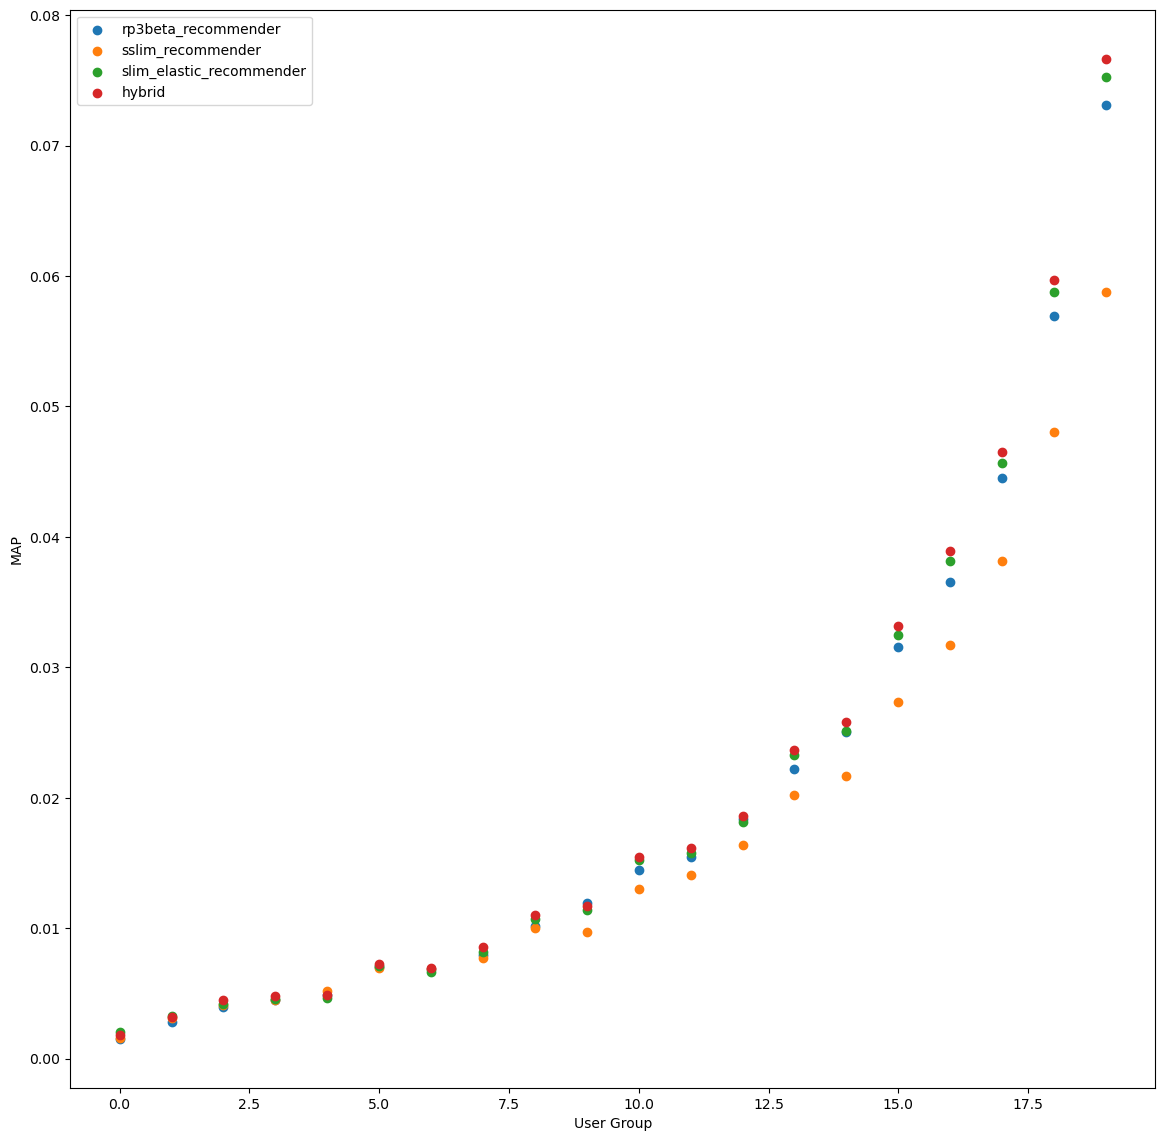

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  

_ = plt.figure(figsize=(14, 14))
for label, recommender in recommender_object_dict.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label,)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()

### Evaluation

In [18]:
evaluator_test = EvaluatorHoldout(URMv_test, [10])
ris, _ = evaluator_test.evaluateRecommender(hybrid)
ris

EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 40039 (100.0%) in 49.18 sec. Users per second: 814


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.043085,0.072534,0.067942,0.021523,0.035521,0.141612,NaN,0.052731,0.282699,0.172873,...,0.961805,0.271902,0.961805,0.018275,9.012893,0.995066,0.041787,0.670211,3.615258,0.269307



### Reference 

In [19]:
evaluator_test = EvaluatorHoldout(URMv_test, [10])
ris, _ = evaluator_test.evaluateRecommender(best_reference)
ris

EvaluatorHoldout: Ignoring 1590 ( 3.8%) Users that have less than 1 test interactions


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 40039 (100.0%) in 12.42 sec. Users per second: 3223


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.040978,0.068726,0.064347,0.020179,0.033329,0.134681,NaN,0.05007,0.272509,0.163354,...,0.961805,0.262101,0.961805,0.047361,9.452518,0.995112,0.108294,0.702902,3.497277,0.276884
